<a href="https://colab.research.google.com/github/edoucet-AI/project_1_eda/blob/main/project_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# run this cell and give permissions so you are able to access the original csv data file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data into a Pandas DataFrame, Not every CSV requires an encoding, but be aware this can come up
file_path = "/content/drive/MyDrive/Group Project 1/Resources/cleaned_mental_health_dataset.csv"
#we should maybe use the newer set up for this, maybe set the timestamp as the index and we might need to standardize the timestamp before setting it as the index if we go that route? - Jaylen
df_mental_health = pd.read_csv(file_path)


In [ ]:
df_mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_occupation_mental_health = df_mental_health.copy()

In [ ]:
df_occupation_mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
#update the df_occupation_mental_health so it has only columns timestamp, Occupation, Work_Interest, Mood_Swings,treatment, add columns if needed
df_occupation_mental_health = df_occupation_mental_health[['Timestamp', 'Occupation', 'Work_Interest', 'Mood_Swings', 'treatment']]
df_occupation_mental_health

,Timestamp,Occupation,Work_Interest,Mood_Swings,treatment
0,2014-08-27 11:37:00,Corporate,No,Medium,Yes
1,2014-08-27 11:43:00,Corporate,No,Medium,Yes
2,2014-08-27 11:49:00,Corporate,No,Medium,Yes
3,2014-08-27 11:51:00,Corporate,No,Medium,Yes
4,2014-08-27 11:52:00,Corporate,No,Medium,No
...,...,...,...,...,...
287157,2015-07-27 23:25:00,Business,No,Low,Yes
287158,2015-08-17 09:38:00,Business,No,Low,Yes
287159,2015-08-25 19:59:00,Business,No,Low,No
287160,2015-09-26 01:07:00,Business,No,Low,Yes


In [ ]:
#setting Timestamp as index
df_occupation_mental_health['Timestamp'] = pd.to_datetime(df_occupation_mental_health['Timestamp'])
df_occupation_mental_health.set_index('Timestamp', inplace=True)
df_occupation_mental_health.head()


<ipython-input-11-af4936d14608>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occupation_mental_health['Timestamp'] = pd.to_datetime(df_occupation_mental_health['Timestamp'])


,Occupation,Work_Interest,Mood_Swings,treatment
Timestamp,,,,
2014-08-27 11:37:00,Corporate,No,Medium,Yes
2014-08-27 11:43:00,Corporate,No,Medium,Yes
2014-08-27 11:49:00,Corporate,No,Medium,Yes
2014-08-27 11:51:00,Corporate,No,Medium,Yes
2014-08-27 11:52:00,Corporate,No,Medium,No


In [ ]:
df_occupation_mental_health['work_interest_numeric'] = df_occupation_mental_health['Work_Interest'].map({'Yes': 1, 'No': 0})
df_occupation_mental_health['treatment_numeric'] = df_occupation_mental_health['treatment'].map({'Yes': 1, 'No': 0})
df_occupation_mental_health.head()

,Occupation,Work_Interest,Mood_Swings,treatment,work_interest_numeric,treatment_numeric
Timestamp,,,,,,
2014-08-27 11:37:00,Corporate,No,Medium,Yes,0.0,1
2014-08-27 11:43:00,Corporate,No,Medium,Yes,0.0,1
2014-08-27 11:49:00,Corporate,No,Medium,Yes,0.0,1
2014-08-27 11:51:00,Corporate,No,Medium,Yes,0.0,1
2014-08-27 11:52:00,Corporate,No,Medium,No,0.0,0


# Data Understanding:


---


Familiarize Yourself with the Data:
Read the dataset description and documentation. Understand each feature (column) and its significance.
[link to kaggle page here ](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset)


---


Identify Data Types:
Determine which features are numerical, categorical, ordinal, etc.

In [ ]:

# Review the DataFrame head of the df
df_mental_health.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
#tail of the df
df_mental_health.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
287157,2015-07-27 23:25:00,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
287158,2015-08-17 09:38:00,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287159,2015-08-25 19:59:00,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
287160,2015-09-26 01:07:00,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
287161,2016-02-01 23:04:00,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


# Data Cleaning:

---


Handle Missing Values:
Decide whether to remove, fill, or leave missing values.
Use methods like mean/median imputation or regression techniques.

---


Correct Inconsistencies:
Standardize categories (e.g., 'Yes', 'yes', 'Y' to 'Yes').
Fix typos or incorrect data entries.

---


Remove Duplicates:
Ensure that there are no repeated records that could skew analysis.



#Data Exploration:

---


Descriptive Statistics:
Compute measures like mean, median, mode, variance, and standard deviation.

---


Visual Exploration:
Use histograms, box plots, and bar charts to understand data distribution.

---


Identify Outliers:
Determine if extreme values are errors or significant findings.


# Data Transformation:

---


Feature Engineering:
Create new features that might be useful (e.g., total stress score).

---


Encoding Categorical Variables:
Convert categories into numerical values using one-hot encoding or label encoding.

---


Scaling:
Normalize or standardize data if needed for analysis.

#Data Analysis:

---


Correlation Analysis:
Use correlation matrices to find relationships between variables.
Group data based on demographics or other criteria to find patterns.

#Visualization:

---


Advanced Plots:
Create heatmaps, scatter plots, violin plots, etc.

---


Interactive Visualizations:
Use tools like Plotly for dynamic graphs.

---


Maps:
If location data is available, use geospatial plots.

#Interpretation and Conclusion:

---


Summarize Findings:
Highlight significant patterns and correlations.

---


Draw Conclusions:
Relate back to your initial questions and objectives.

---


Discuss Limitations:
Acknowledge any constraints or potential biases in your analysis.

#Documentation:

---


Code Comments:
Explain your code for clarity.

---


README File:
Provide an overview, usage instructions, and summarize findings.

---


Presentation Preparation:
Develop slides that convey your project's story effectively.

#Full List of Questions

---
Is there a correlation between occupation type and seeking mental health treatment?
Related Columns: Occupation, treatment

---


Is there a relationship between occupation type and loss of interest in work?
Related Columns: Occupation, Work_Interest

---


Is there a correlation between occupation type and the likelihood of experiencing mood swings?
Related Columns: Occupation, Mood_Swings

---


Are people in certain occupations more likely to report mental health struggles and seek treatment?
Related Columns: Occupation, treatment, Mood_Swings

---


Does the type of occupation correlate with both mood swings and a loss of interest in work?
Related Columns: Occupation, Mood_Swings, Work_Interest



#Is there a correlation between occupation type and seeking mental health treatment?
Related Columns: Occupation, treatment

Step 1: Creating the Data Frame that will be used for the question number one.

In [ ]:
#creating a new data frame with the following columns (Occupation,treatment)
df_mental_health_emd = df_mental_health[['Occupation','treatment']]
df_mental_health_emd.head()

,Occupation,treatment
0,Corporate,Yes
1,Corporate,Yes
2,Corporate,Yes
3,Corporate,Yes
4,Corporate,No


Step 2 : Analyzing the relationship between Occupation and Seeking Mental Health Treatment.

In [ ]:
# Grouping Treatment column by Occupation column with value count
df_treatment_emd = df_mental_health_emd.groupby('Occupation',as_index=False)['treatment'].value_counts()
df_treatment_emd.head()
# Rename the column Count as treatment_num
df_treatment_emd = df_treatment_emd.rename(columns={'count':'treatment_num'})
display(df_treatment_emd.head())
display(df_treatment_emd.tail())

,Occupation,treatment,treatment_num
0,Business,Yes,24945
1,Business,No,24307
2,Corporate,No,30278
3,Corporate,Yes,29879
4,Housewife,Yes,32785


,Occupation,treatment,treatment_num
5,Housewife,No,32388
6,Others,Yes,26355
7,Others,No,25538
8,Student,Yes,30780
9,Student,No,29907


<Axes: title={'center': 'Occupation vs Seeking Treatment'}, xlabel='Occupation'>

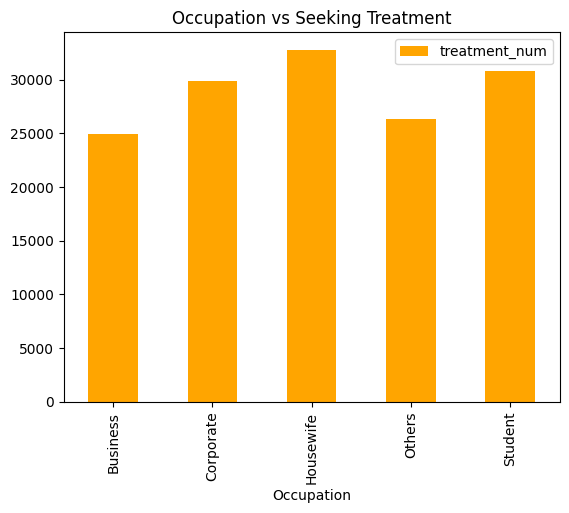

In [ ]:
# Filter to only display occupations where the treatment value is equal to Yes
df_treatment_emd_yes = df_treatment_emd[df_treatment_emd['treatment'] == 'Yes']
df_treatment_emd_yes.head()

# Plot the data using a bar chart with occupation as the x axis and treatment as the y axis
df_treatment_emd_yes.plot(kind='bar', x='Occupation', y='treatment_num',color='orange',title='Occupation vs Seeking Treatment')
plt.ledgend()
plt.xticks(rotation=45)

Summary Step 2: Of all the occupations listed in this dataset, the occupation of Housewife had the highest number of instances of seeking mental health treatment of all the occupations. The occupation of Student was the 2nd highest occupation that seeked mental health treatment.

Step 3: Analyze the correlation between the occupation of Housewife and Treatment.

In [ ]:
# Grouping Treatment column by occupation column where column value is Housewife with value count
df_treatment_housewife_emd = df_mental_health_emd[df_mental_health_emd['Occupation'] == 'Housewife'].groupby('Occupation',as_index=False)['treatment'].value_counts()

# Rename the column Count as occupation_treatment_num
df_treatment_housewife_emd = df_treatment_housewife_emd.rename(columns={'count':'occupation_treatment_num'})
df_treatment_housewife_emd

,Occupation,treatment,occupation_treatment_num
0,Housewife,Yes,32785
1,Housewife,No,32388


In [ ]:
# Map the treatment column string values to numerical values where Yes = 1 and No = 0
df_treatment_housewife_emd['treatment']=df_treatment_housewife_emd['treatment'].map({'Yes':1,'No':0})
df_treatment_housewife_emd.head()

,Occupation,treatment,occupation_treatment_num
0,Housewife,1,32785
1,Housewife,0,32388


([<matplotlib.axis.XTick at 0x7c34dec411b0>,
 [Text(0, 0, 'Seeked Treatment'), Text(1, 0, 'Did Not Seek Treatment')])

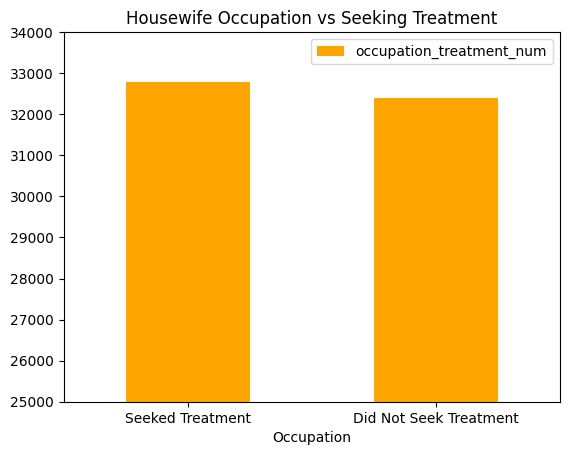

In [ ]:
# Plot treatment versus Housewife occupation on a bar chart for those who did and didnt seek treatment
df_treatment_housewife_emd.plot(kind='bar',x='Occupation',y='occupation_treatment_num',color='orange',title='Housewife Occupation vs Seeking Treatment')
plt.ylim(25000,34000)
plt.xticks(plt.xticks()[0],labels=['Seeked Treatment', 'Did Not Seek Treatment'],rotation=0)

Summary Step 3:

###Conclusion:

#Is there a relationship between occupation type and loss of interest in work?
Related Columns: Occupation, Work_Interest




#Is there a correlation between occupation type and the likelihood of experiencing mood swings?
Related Columns: Occupation, Mood_Swings


### Step 1: Creating the Data Frame that will be udes for the question number three.

In [ ]:
#creating a new data frame with the following columns (Occupation,self_employed,Growing_Stress,Mood_Swings)
df_mental_health_asm = df_mental_health[['Occupation','self_employed','Mood_Swings']]
df_mental_health_asm.head()

,Occupation,self_employed,Mood_Swings
0,Corporate,No,Medium
1,Corporate,No,Medium
2,Corporate,No,Medium
3,Corporate,No,Medium
4,Corporate,No,Medium


-----------------------------------------------------------------------------------------------------------------------------------------
### Step 2 : Analysing the relationship between Mood Swimg and Occupation.


In [ ]:
# Grouping Mood_Swings column by Occupation column with value count
df_Mood_swing_asm = df_mental_health_asm.groupby('Occupation',as_index=False)['Mood_Swings'].value_counts()
df_Mood_swing_asm.head()
# Rename the column Count as mood_swing_num
df_Mood_swing_asm = df_Mood_swing_asm.rename(columns={'count':'mood_swing_num'})
display(df_Mood_swing_asm.head())
display(df_Mood_swing_asm.tail())


,Occupation,Mood_Swings,mood_swing_num
0,Business,Medium,20377
1,Business,Low,15522
2,Business,High,13353
3,Corporate,Medium,27017
4,Corporate,Low,17367


,Occupation,Mood_Swings,mood_swing_num
10,Others,High,16127
11,Others,Medium,14799
12,Student,High,26530
13,Student,Low,18281
14,Student,Medium,15876


In [ ]:
# Loc to only hight mood swing
df_high_mood_swings_asm = df_Mood_swing_asm.loc[df_Mood_swing_asm['Mood_Swings'] == 'High']
df_high_mood_swings_asm = df_high_mood_swings_asm.set_index('Occupation')
df_high_mood_swings_asm.head()

,Mood_Swings,mood_swing_num
Occupation,,
Business,High,13353
Corporate,High,15773
Housewife,High,18045
Others,High,16127
Student,High,26530


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Housewife'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Student')])

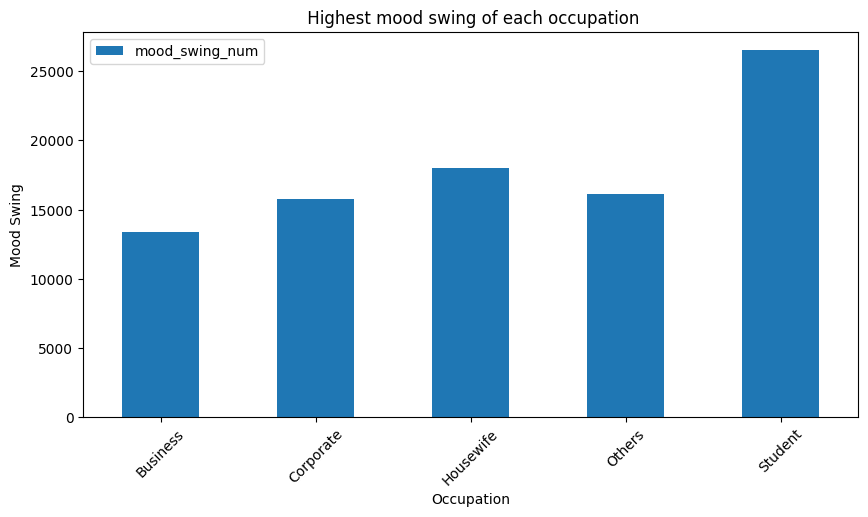

In [ ]:
# Plot the highest mood swing of each occupation
df_high_mood_swings_asm.plot(xlabel='Occupation',ylabel='Mood Swing',\
                       figsize=(10,5),kind='bar'\
                        ,title=' Highest mood swing of each occupation')
plt.xticks(rotation=45)

In [ ]:
# Reset index
df_high_mood_swings_asm=df_high_mood_swings_asm.reset_index()

In [ ]:
# Filtering the values Business and Corporate
df_high_mood_swings_asm= df_high_mood_swings_asm.loc[(df_high_mood_swings_asm['Occupation']=='Business') | (df_high_mood_swings_asm['Occupation'] =='Corporate')]
# Set Occupation as index
df_high_mood_swings_asm = df_high_mood_swings_asm.set_index('Occupation')

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Corporate')])

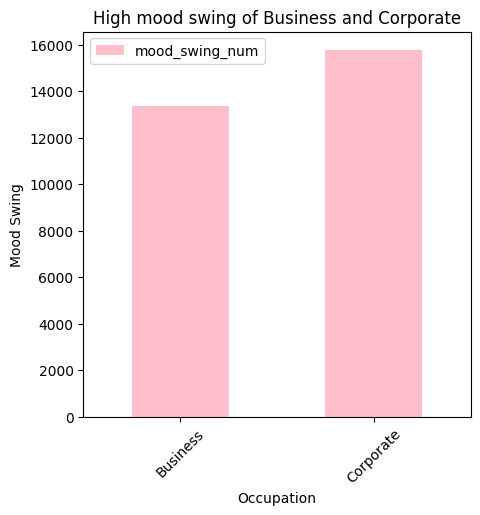

In [ ]:
# Plotting the bar chart
df_high_mood_swings_asm.plot(kind='bar',xlabel='Occupation',ylabel='Mood Swing',figsize=(5,5) ,color='pink')
plt.title('High mood swing of Business and Corporate')
plt.xticks(rotation=45)

### Summary step 2 :

Based on the first plot , the people who has the highest mood swing are the students and then it comes others , others it may refere to unemployed people.

On the second bar plot, it is clear that Corporate occupation show higher mood swing values compared to business occupations. this indicate that Corporate jobs are more emotionlly draining or have more instance of mood swings than Business jobs.

  

--------------------------------------------------------------------------------
### Step 3 : Analyzing the relationship between Mood swing and self employed.

In [ ]:
# Grouping Mood_Swings column by self_employed column with value count
df_Mood_swing_self_employed_asm = df_mental_health_asm.groupby(['self_employed'],as_index=False)['Mood_Swings'].value_counts()
df_Mood_swing_self_employed_asm = df_Mood_swing_self_employed_asm.rename(columns={'count':'mood_swing_self_employed_num'})
df_Mood_swing_self_employed_asm

,self_employed,Mood_Swings,mood_swing_self_employed_num
0,No,Medium,89152
1,No,Low,88076
2,No,High,80766
3,Yes,Medium,10120
4,Yes,Low,9986
5,Yes,High,9062


In [ ]:
# Creating numerical column for self employed column with map function
df_Mood_swing_self_employed_asm['self_employed']=df_Mood_swing_self_employed_asm['self_employed'].map({'Yes':1,'No':0})
df_Mood_swing_self_employed_asm

,self_employed,Mood_Swings,mood_swing_self_employed_num
0,0,Medium,89152
1,0,Low,88076
2,0,High,80766
3,1,Medium,10120
4,1,Low,9986
5,1,High,9062


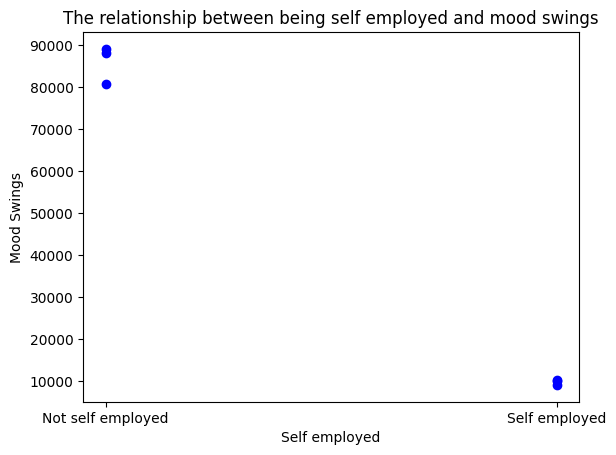

In [ ]:
# Plot mood swing versus self employed on a scatterplot
plt.scatter(df_Mood_swing_self_employed_asm['self_employed'],df_Mood_swing_self_employed_asm['mood_swing_self_employed_num'], color='blue')
plt.xlabel('Self employed')
plt.ylabel('Mood Swings')
plt.title('The relationship between being self employed and mood swings')
plt.show()

In [ ]:
# The correlation between two variables self_empoyed and mood_swing_self_employed_num
mood_swing_correlation_asm = df_Mood_swing_self_employed_asm[['self_employed' , 'mood_swing_self_employed_num']].corr().round(3)
display(mood_swing_correlation_asm)

,self_employed,mood_swing_self_employed_num
self_employed,1.000,-0.998
mood_swing_self_employed_num,-0.998,1.000


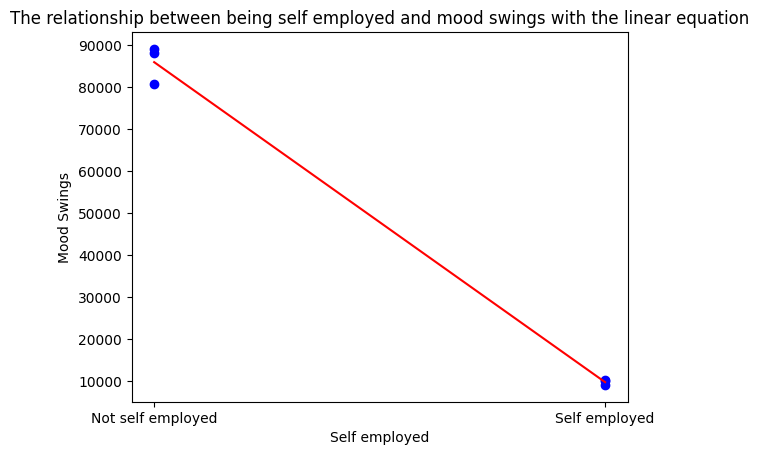

In [ ]:
# Adding the linear regression equation and line to plot
x_values_asm = df_Mood_swing_self_employed_asm['self_employed']
y_values_asm = df_Mood_swing_self_employed_asm['mood_swing_self_employed_num']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_asm, y_values_asm)
regress_values_asm = x_values_asm * slope + intercept
line_eq_asm = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_asm,y_values_asm,color='blue')
plt.plot(x_values_asm,regress_values_asm,"r-")
plt.annotate(line_eq_asm,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Self employed')
plt.ylabel('Mood Swings')
plt.xticks([0,1],['Not self employed','Self employed'])
plt.title('The relationship between being self employed and mood swings with the linear equation')
plt.show()

### Summary step 3 :
The pearson coefficient is -0.996, the result is between -1 and 0 , it is
very close to -1 which is very strong negative correlation.
This means that as self employed values increases, the mood swing  decreases, the negative sign indicate an inverse relationship
between the two variables. the more likely someone is to be self employed, the lower their mood swings are.

### Conclusion :
The Most Emotionally Draining jobs are Corporate jobs and the none self employed people, Corporate jobs often come with high levels of responsibility, long working hours, intense competition, and demanding deadlines. These factors can contribute to increased stress levels among employees.Also none self employed jobs are very stressful, they come with unfair treatment,working conditions, Not having control over how you do your work can be stressful and tight deadlines.The more likely someone is to be self employed, the lower their mood swings are.

-------------------------------------------------------------------------------------------------------------

#Are people in certain occupations more likely to report mental health struggles and seek treatment?
Related Columns: Occupation, treatment, Mood_Swings

# Does the type of occupation correlate with both mood swings and a loss of interest in work?
Related Columns: Occupation, Mood_Swings, Work_Interest

Question regarding times indoors

In [ ]:
#setting up df for Jaylen
df_mental_health_jay = df_mental_health.copy()
#convert timestamp to datetime
df_mental_health_jay['Timestamp'] = pd.to_datetime(df_mental_health_jay['Timestamp'])
#set timestamp as index
df_mental_health_jay.set_index('Timestamp', inplace=True)

In [ ]:
df_mental_health_jay.isna().sum()

,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0
Mental_Health_History,0


In [ ]:
# List of columns to exclude
exclude_columns = ['Gender', 'Country']

# Loop through each column and print unique values
for col in df_mental_health_jay.columns:
    if col not in exclude_columns:
        print(f"Unique values in column '{col}':")
        print(df_mental_health_jay[col].unique())
        print('-' * 50)  # Separator for readability

Unique values in column 'Occupation':
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
--------------------------------------------------
Unique values in column 'self_employed':
['No' 'Yes']
--------------------------------------------------
Unique values in column 'family_history':
['Yes' 'No']
--------------------------------------------------
Unique values in column 'treatment':
['Yes' 'No']
--------------------------------------------------
Unique values in column 'Days_Indoors':
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
--------------------------------------------------
Unique values in column 'Growing_Stress':
['Yes' 'No' 'Maybe']
--------------------------------------------------
Unique values in column 'Changes_Habits':
['No' 'Yes' 'Maybe']
--------------------------------------------------
Unique values in column 'Mental_Health_History':
['Yes' 'No' 'Maybe']
--------------------------------------------------
Unique values in colum

In [ ]:
# Define the mapping dictionary
mapping_dict = {'Yes': 1, 'No': 0, 'Maybe': 0.5, 'Not sure': 0.5}

# List of columns to map
columns_to_map = [
    'self_employed',
    'family_history',
    'treatment',
    'Growing_Stress',
    'Changes_Habits',
    'Mental_Health_History',
    'Work_Interest',
    'Social_Weakness',
    'mental_health_interview',
    'care_options'
]

# Apply the mapping and create new numeric columns
for col in columns_to_map:
    new_col_name = f"{col}_numeric"
    df_mental_health_jay[new_col_name] = df_mental_health_jay[col].map(mapping_dict)

# Map 'Coping_Struggles' and create a new numeric column
df_mental_health_jay['Coping_Struggles_numeric'] = df_mental_health_jay['Coping_Struggles'].map({'Yes': 1, 'No': 0})

# Define the mapping for 'Mood_Swings'
mood_swings_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping and create a new numeric column
df_mental_health_jay['Mood_Swings_numeric'] = df_mental_health_jay['Mood_Swings'].map(mood_swings_mapping)

# Mapping for 'Days_Indoors'
days_indoors_mapping = {
    'Go out Every day': 0,
    '1-14 days': 7,
    '15-30 days': 22,
    '31-60 days': 45,
    'More than 2 months': 75
}

# Apply the mapping and create a new numeric column
df_mental_health_jay['Days_Indoors_numeric'] = df_mental_health_jay['Days_Indoors'].map(days_indoors_mapping)



In [ ]:
# List of all new numeric columns
numeric_columns = [f"{col}_numeric" for col in columns_to_map] + ['Coping_Struggles_numeric', 'Mood_Swings_numeric', 'Days_Indoors_numeric']

# Verify the unique values
for col in numeric_columns:
    print(f"Unique values in '{col}': {df_mental_health_jay[col].unique()}")


Unique values in 'self_employed_numeric': [0. 1.]
Unique values in 'family_history_numeric': [1. 0.]
Unique values in 'treatment_numeric': [1. 0.]
Unique values in 'Growing_Stress_numeric': [1.  0.  0.5]
Unique values in 'Changes_Habits_numeric': [0.  1.  0.5]
Unique values in 'Mental_Health_History_numeric': [1.  0.  0.5]
Unique values in 'Work_Interest_numeric': [0.  0.5 1. ]
Unique values in 'Social_Weakness_numeric': [1.  0.  0.5]
Unique values in 'mental_health_interview_numeric': [0.5 0.  1. ]
Unique values in 'care_options_numeric': [1.  0.5 0. ]
Unique values in 'Coping_Struggles_numeric': [0 1]
Unique values in 'Mood_Swings_numeric': [2 1 3]
Unique values in 'Days_Indoors_numeric': [ 7  0 75 22 45]


In [ ]:
# Check for missing values in new numeric columns
missing_values = df_mental_health_jay[numeric_columns].isnull().sum()
print("Missing values in new numeric columns:")
print(missing_values)


Missing values in new numeric columns:
self_employed_numeric              0
family_history_numeric             0
treatment_numeric                  0
Growing_Stress_numeric             0
Changes_Habits_numeric             0
Mental_Health_History_numeric      0
Work_Interest_numeric              0
Social_Weakness_numeric            0
mental_health_interview_numeric    0
care_options_numeric               0
Coping_Struggles_numeric           0
Mood_Swings_numeric                0
Days_Indoors_numeric               0
dtype: int64


In [ ]:
# Compute the correlation matrix using numeric columns
correlation_matrix = df_mental_health_jay[numeric_columns].corr()

# Get correlations with 'Days_Indoors_numeric'
days_indoors_corr = correlation_matrix['Days_Indoors_numeric'].sort_values(ascending=False)
print("Correlation of 'Days_Indoors_numeric' with other variables:")
print(days_indoors_corr)


Correlation of 'Days_Indoors_numeric' with other variables:
Days_Indoors_numeric               1.000000
Growing_Stress_numeric             0.037750
Coping_Struggles_numeric           0.023845
Mental_Health_History_numeric      0.015024
Mood_Swings_numeric                0.008347
family_history_numeric             0.001791
treatment_numeric                  0.001547
care_options_numeric               0.000970
self_employed_numeric             -0.000593
mental_health_interview_numeric   -0.001046
Changes_Habits_numeric            -0.003337
Social_Weakness_numeric           -0.030708
Work_Interest_numeric             -0.043527
Name: Days_Indoors_numeric, dtype: float64


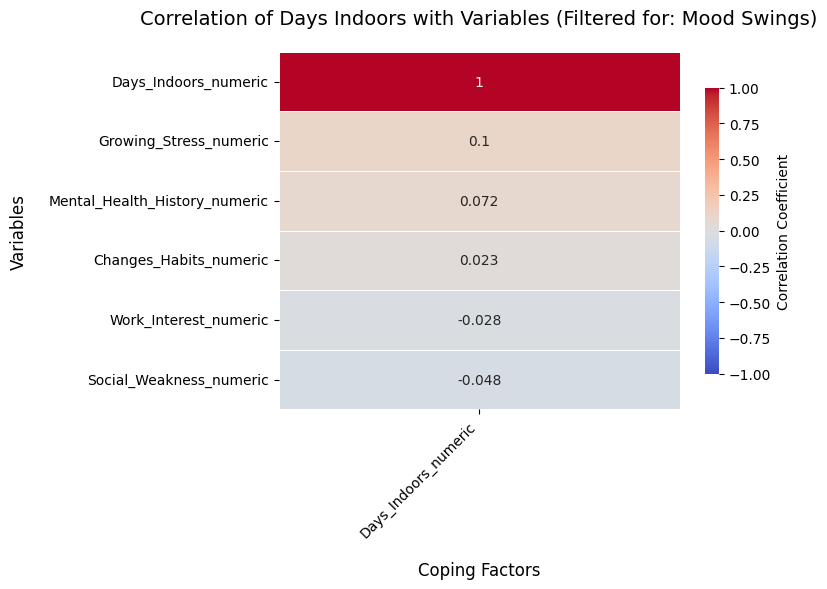


**Dynamic Explanation:**
This heatmap shows how time spent indoors correlates with other factors for individuals who meet the following conditions: Mood Swings
Correlations greater than or equal to 0.02 (positive or negative) are shown.

- **Growing_Stress_numeric** has a **weak positive correlation** of 0.10 with Days Indoors.
  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have increased Growing Stress.

- **Mental_Health_History_numeric** has a **weak positive correlation** of 0.07 with Days Indoors.
  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have increased Mental Health History.

- **Changes_Habits_numeric** has a **weak positive correlation** of 0.02 with Days Indoors.
  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have increased Changes Habits.

- **Work_Interest_numeric** has a

In [ ]:
def create_dynamic_heatmap(df, columns_to_check, threshold=0.015, title="", x_label="Variables", y_label="Correlated Variable"):
    """
    Function to create a dynamic heatmap based on selected columns and a correlation threshold.

    Parameters:
    df: DataFrame - The DataFrame containing the data
    columns_to_check: list - List of columns to filter for the value 1
    threshold: float - The threshold for correlations to include in the heatmap
    title: str - The title for the heatmap
    x_label: str - Label for the x-axis
    y_label: str - Label for the y-axis
    """

    # Step 1: Filter rows where all specified columns are equal to 1
    filtered_rows = df[df[columns_to_check].eq(1).all(axis=1)]

    # Step 2: Calculate the correlation matrix using the filtered rows
    correlation_matrix_filtered_rows = filtered_rows[numeric_columns].corr()

    # Step 3: Get the correlation of 'Days_Indoors_numeric' with other variables in the filtered subset
    days_indoors_corr_filtered = correlation_matrix_filtered_rows['Days_Indoors_numeric'].sort_values(ascending=False)

    # Step 4: Filter correlations to include both positive and negative correlations greater than or equal to the threshold
    filtered_corr_vars = days_indoors_corr_filtered[
        (days_indoors_corr_filtered >= threshold) | (days_indoors_corr_filtered <= -threshold)
    ]

    # Step 5: Plot the heatmap (keep Days_Indoors_numeric)
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    # Create the heatmap
    ax = sns.heatmap(filtered_corr_vars.to_frame(),
                     annot=True,  # Show correlation values
                     cmap='coolwarm',  # Color palette
                     vmin=-1, vmax=1,  # Set color range from -1 to 1
                     linewidths=0.5,  # Add small lines between cells
                     cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})  # Shrink color bar and add label

    # Generate a dynamic title based on the columns being checked
    dynamic_title = f"Correlation of Days Indoors with Variables (Filtered for: {', '.join(columns_to_check).replace('_numeric', '').replace('_', ' ').title()})"
    plt.title(dynamic_title, fontsize=14, pad=20)  # Dynamic title

    plt.xlabel(x_label, fontsize=12, labelpad=15)  # Dynamic x-axis label
    plt.ylabel(y_label, fontsize=12, labelpad=15)  # Dynamic y-axis label

    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

    # Adjust layout and display the heatmap
    plt.tight_layout()
    plt.show()

    # Step 6: Generate a dynamic explanation based on the filtered correlations (exclude Days_Indoors_numeric from the analysis feedback)
    print("\n**Dynamic Explanation:**")
    print(f"This heatmap shows how time spent indoors correlates with other factors for individuals who meet the following conditions: {', '.join(columns_to_check).replace('_numeric', '').replace('_', ' ').title()}")
    print(f"Correlations greater than or equal to {threshold} (positive or negative) are shown.\n")

    # Exclude Days_Indoors_numeric from the explanation
    filtered_corr_vars_without_days_indoors = filtered_corr_vars.drop('Days_Indoors_numeric', errors='ignore')

    for var, corr_value in filtered_corr_vars_without_days_indoors.items():
        if corr_value > 0:
            if corr_value > 0.3:
                print(f"- **{var}** has a **moderate to strong positive correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: Individuals with more time spent indoors and have these conditions are more likely to report higher levels of {var.replace('_numeric', '').replace('_', ' ').title()}.\n")
            else:
                print(f"- **{var}** has a **weak positive correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have increased {var.replace('_numeric', '').replace('_', ' ').title()}.\n")
        else:
            if corr_value < -0.3:
                print(f"- **{var}** has a **moderate to strong negative correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: Individuals with more time spent indoors and have these conditions are more likely to experience a **decrease** in {var.replace('_numeric', '').replace('_', ' ').title()}.\n")
            else:
                print(f"- **{var}** has a **weak negative correlation** of {corr_value:.2f} with Days Indoors.")
                print(f"  *Interpretation*: There is a slight tendency for those who spend more time indoors and have these conditions to have lower {var.replace('_numeric', '').replace('_', ' ').title()}.\n")

# Columns you can use for the dynamic heatmap
numeric_columns = [
    'self_employed_numeric',
    'family_history_numeric',
    'treatment_numeric',
    'Growing_Stress_numeric',
    'Changes_Habits_numeric',
    'Mental_Health_History_numeric',
    'Work_Interest_numeric',
    'Social_Weakness_numeric',
    'mental_health_interview_numeric',
    'care_options_numeric',
    'Coping_Struggles_numeric',
    'Mood_Swings_numeric',
    'Days_Indoors_numeric'
]

# Example usage with dynamic inputs
columns_to_check = [
        'Mood_Swings_numeric'
]

# Call the dynamic heatmap function
create_dynamic_heatmap(
    df=df_mental_health_jay,
    columns_to_check=columns_to_check,
    threshold=0.02,  # You can adjust this dynamically
    title="Correlation of Days Indoors with Variables",  # This will now be overwritten dynamically
    x_label="Coping Factors",
    y_label="Variables"
)


<ipython-input-35-8476ad4f95ad>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_comparison = df_mental_health_jay.groupby('Days_Indoors_grouped')[['Growing_Stress_numeric', 'Coping_Struggles_numeric']].mean()


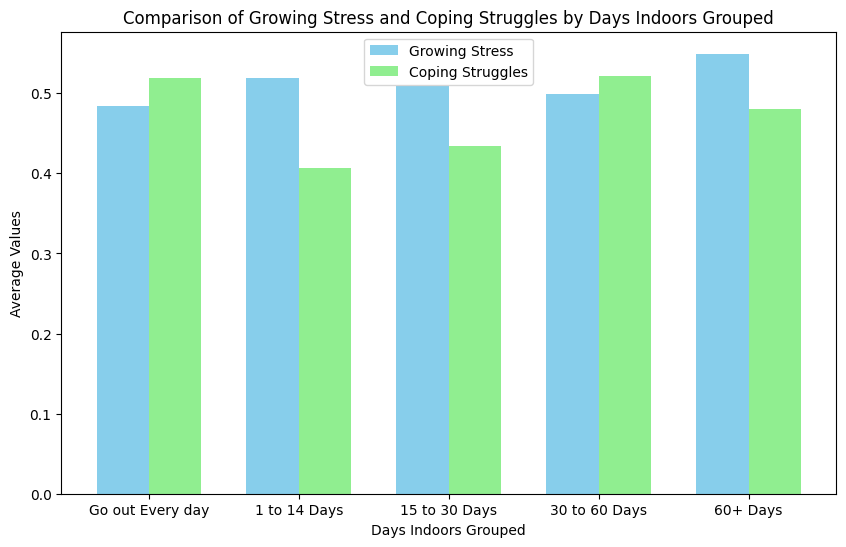

In [ ]:
# Define a new column 'Days_Indoors_grouped' for the categories
#define the low  range
df_mental_health_jay['Days_Indoors_grouped'] = pd.cut(
    df_mental_health_jay['Days_Indoors_numeric'],
    bins=[-1, 0, 14, 30, 60, float('inf')],  # Adjust bins based on your categories
    labels=['Go out Every day', '1 to 14 Days', '15 to 30 Days', '30 to 60 Days', '60+ Days']  # Custom labels
)

# Group by 'Days_Indoors_grouped' and calculate the mean for Growing Stress and Coping Struggles
grouped_comparison = df_mental_health_jay.groupby('Days_Indoors_grouped')[['Growing_Stress_numeric', 'Coping_Struggles_numeric']].mean()

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width and the positions for each group
bar_width = 0.35
index = np.arange(len(grouped_comparison))

# Create the bars for Growing Stress and Coping Struggles
bars1 = ax.bar(index, grouped_comparison['Growing_Stress_numeric'], bar_width, label='Growing Stress', color='skyblue')
bars2 = ax.bar(index + bar_width, grouped_comparison['Coping_Struggles_numeric'], bar_width, label='Coping Struggles', color='lightgreen')

# Add titles and labels
ax.set_title('Comparison of Growing Stress and Coping Struggles by Days Indoors Grouped')
ax.set_xlabel('Days Indoors Grouped')
ax.set_ylabel('Average Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_comparison.index, rotation=0)

# Add a legend to differentiate between Growing Stress and Coping Struggles
ax.legend()

# Display the plot
plt.show()
